# Previsão de Cancelamento de Reservas de Hotel

## Índice
1. [Introdução](#1-introdução)

2. [Exploração e Preparação dos Dados](#2-exploração-e-preparação-dos-dados)
   - [Análise descritiva](#2.1-análise-descritiva)
   - [Variável Target](#2.2-variável-target)
   - [Atributos Numéricos](#2.3-atributos-numéricos)
   - [Atributos Categóricos](#2.4-atributos-categóricos)
   - [Agregação de colunas](#2.5-agregação-de-colunas)
   - [Duplicados](#2.6-duplicados)
   - [Valores em Falta e respetivo preenchimento](#2.7-valores-em-falta-e-respetivo-preenchimento)
   - [Matriz de correlação](#2.8-matriz-de-correlação)

3. [Pré-processamento dos Dados](#3-pré-processamento-dos-dados)
   - [Normalização](#3.1-normalização)
   - [Divisão dos dados, Escalonamento e PCA](#3.2-divisão-dos-dados-escalonamento-e-pca)
   - [Identificação e Remoção de outliers](#3.3-identificação-e-remocao-de-outliers)

4. [Feature Selection](#4-feature-selection)
   - [Filter Methods](#4.1-filter-methods)
     - [ANOVA](#4.1.1-anova)
     - [CHI-SQUARED](#4.1.2-chi-squared)
   - [Embedded Methods](#4.2-embedded-methods)
     - [LASSO Regularization](#4.2.1-lasso-regularization)
     - [Random Forest Algorithm](#4.2.2-random-forest-algorithm)

5. [Criação e Comparação entre modelos](#5-criação-e-comparação-entre-modelos)
   - [Neural Networks](#5.1-neural-networks)

6. [Combinação de modelos](#6-combinação-de-modelos)

7. [Conclusão](#7-conclusão)
   - [Sumário dos principais resultados](#sumário-dos-principais-resultados)


## 1. Introdução
O objetivo deste projeto é desenvolver modelos preditivos para identificar a probabilidade de cancelamento de reservas de hotel. Utilizando um conjunto de dados extenso que inclui diversas características dos clientes, como tempo de antecedência da reserva, tipo de cliente e segmento de mercado, pretendemos explorar, pré-processar e aplicar algoritmos de mineração de dados para construir modelos preditivos robustos. A análise segue a metodologia CRISP-DM, abrangendo as fases de exploração e preparação dos dados.

Carregaram-se as bibliotecas necessárias e preparou-se o ambiente para a análise.

In [233]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# 2. Exploração e Preparação dos Dados

Carregou-se o conjunto de dados num DataFrame para análise.

In [236]:
# Load the dataset
data_path = 'Metro_Interstate_Traffic_Volume_reduced.csv' 
df = pd.read_csv(data_path)

df

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.09,1450


Verificaram-se os tipos de dados das colunas.

In [238]:

# Check data types
df.dtypes


date_time               object
holiday                 object
weather_main            object
weather_description     object
rain_1h                float64
snow_1h                float64
clouds_all               int64
temp                   float64
traffic_volume           int64
dtype: object

<div class="alert alert-block alert-info">
Concluiu-se que existe uma variedade de dados no conjunto. Existem variáveis categóricas, como hotel, meal, country, market_segment, deposit_type, customer_type e reservation_status, que representam informações descritivas sobre as reservas e os clientes. Há também variáveis numéricas inteiras, como is_canceled, lead_time, arrival_date_year, stays_in_weekend_nights, adults, previous_cancellations e booking_changes. Variáveis numéricas com casas decimais, como children, adr, agent e company, representam dados contínuos com precisão decimal. Além disso, existem variáveis de data, como reservation_status_date.
</div>

## 2.1 Análise descritiva 

In [241]:
df.info

<bound method DataFrame.info of                  date_time holiday  weather_main     weather_description  \
0      2016-07-01 00:00:00     NaN         Clear            sky is clear   
1      2016-07-01 01:00:00     NaN         Clear            sky is clear   
2      2016-07-01 02:00:00     NaN         Clear            sky is clear   
3      2016-07-01 03:00:00     NaN         Clear            sky is clear   
4      2016-07-01 04:00:00     NaN         Clear            sky is clear   
...                    ...     ...           ...                     ...   
23617  2018-09-30 19:00:00     NaN        Clouds           broken clouds   
23618  2018-09-30 20:00:00     NaN        Clouds         overcast clouds   
23619  2018-09-30 21:00:00     NaN  Thunderstorm  proximity thunderstorm   
23620  2018-09-30 22:00:00     NaN        Clouds         overcast clouds   
23621  2018-09-30 23:00:00     NaN        Clouds         overcast clouds   

       rain_1h  snow_1h  clouds_all    temp  traffic_vo

In [242]:

# Descriptive statistics for numerical columns
df.describe()


,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,0.494697,0.0,47.238252,282.525740,3245.343282
std,63.969632,0.0,39.583571,12.400988,1959.766880
min,0.000000,0.0,0.000000,243.390000,0.000000
25%,0.000000,0.0,1.000000,273.420000,1211.000000
50%,0.000000,0.0,40.000000,284.755000,3400.000000
75%,0.000000,0.0,90.000000,292.650000,4878.000000
max,9831.300000,0.0,100.000000,310.070000,7280.000000


 Executou-se uma operação de processamento de dados ou análise.

<div class="alert alert-block alert-info">

A análise descritiva das variáveis numéricas do dataset forneceu informações sobre a distribuição e as características dos dados como:

Contagem (count): A maioria das variáveis tem 119.390 observações, mas agent e company têm contagens mais baixas, indicando dados em falta para essas colunas.

Média (mean): A média de is_canceled é 0.37, sugerindo que cerca de 37% das reservas foram canceladas. A variável lead_time tem uma média de 104 dias, indicando que, em média, as reservas são feitas com bastante antecedência.

Desvio padrão (std): Algumas variáveis, como lead_time (106.86) e adr (50.54), têm desvios padrão altos, indicando variação significativa nos valores.

Valores mínimos (min) e máximos (max): Os valores extremos, como adr com um mínimo de -6.38 e um máximo de 5400, podem indicar a presença de outliers.
Outras variáveis, como adults e children, têm valores máximos elevados que podem sugerir reservas incomuns.

Quartis (25%, 50%, 75%): Os quartis mostram a distribuição dos dados. Por exemplo, 50% das reservas têm lead_time de até 69 dias, e 75% das reservas têm até 3 noites em stays_in_week_nights.

</div>

## 2.2 Variável Target

Contaram-se os valores da variável alvo para entender a distribuição.

In [247]:
goal = df['traffic_volume']
counts = goal.value_counts()
percent = goal.value_counts(normalize=True)
percent100 = goal.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Quantidade': counts, 'Percentagem': percent100})

,Quantidade,Percentagem
traffic_volume,,
353,29,0.1%
358,26,0.1%
373,24,0.1%
344,24,0.1%
352,23,0.1%
...,...,...
2955,1,0.0%
3874,1,0.0%
1562,1,0.0%


Concluiu-se que a variável is_canceled apresenta um desbalanceamento, com 63% das reservas não canceladas (valor 0) e 37% canceladas (valor 1).

Plotaram-se gráficos para visualização dos dados.

C:\Users\babis\AppData\Local\Temp\ipykernel_67392\3924323337.py:1: UserWarning: 
The palette list has fewer values (2) than needed (6028) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="traffic_volume", hue="traffic_volume", kind="count", data=df, palette=['#c084fc', '#7b2cbf'], legend=False)


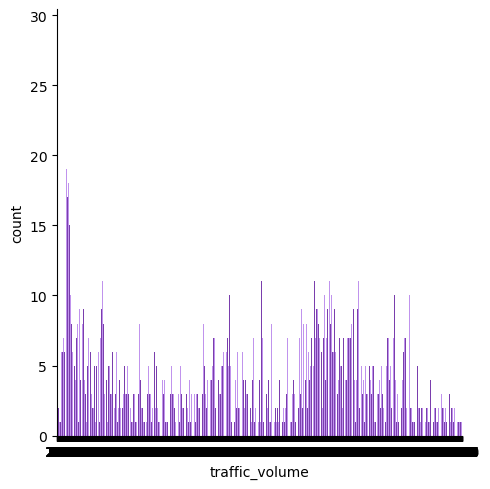

In [250]:
sns.catplot(x="traffic_volume", hue="traffic_volume", kind="count", data=df, palette=['#c084fc', '#7b2cbf'], legend=False)
plt.show()

<div class="alert alert-block alert-info">
O gráfico mostra que a maioria das reservas (cerca de 63%) não foi cancelada, enquanto 37% foram canceladas, evidenciando um desbalanceamento nas classes.
</div>

## 2.3 Atributos Numéricos

O *dataset* (df) apresenta o seguinte conjunto de atributos numéricos:

+ *lead_time*
+ *arrival_date_year*
+ *arrival_date_week_number*
+ *arrival_date_day_of_month*
+ *stays_in_weekend_nights*
+ *stays_in_week_nights*
+ *adults*
+ *children*
+ *babies*
+ *is_repeated_guest*
+ *previous_cancellations*
+ *previous_bookings_not_canceled*
+ *booking_changes*
+ *agent*
+ *company*
+ *days_in_waiting_list*
+ *adr*
+ *required_car_parking_spaces*
+ *total_of_special_requests*



Verificaram-se os tipos de dados das colunas.

In [255]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('traffic_volume', axis=1).columns

print("Existem", len(numerical_cols),"atributos numéricos:" , list(numerical_cols))


Existem 4 atributos numéricos: ['rain_1h', 'snow_1h', 'clouds_all', 'temp']


Plotaram-se gráficos para visualização dos dados.

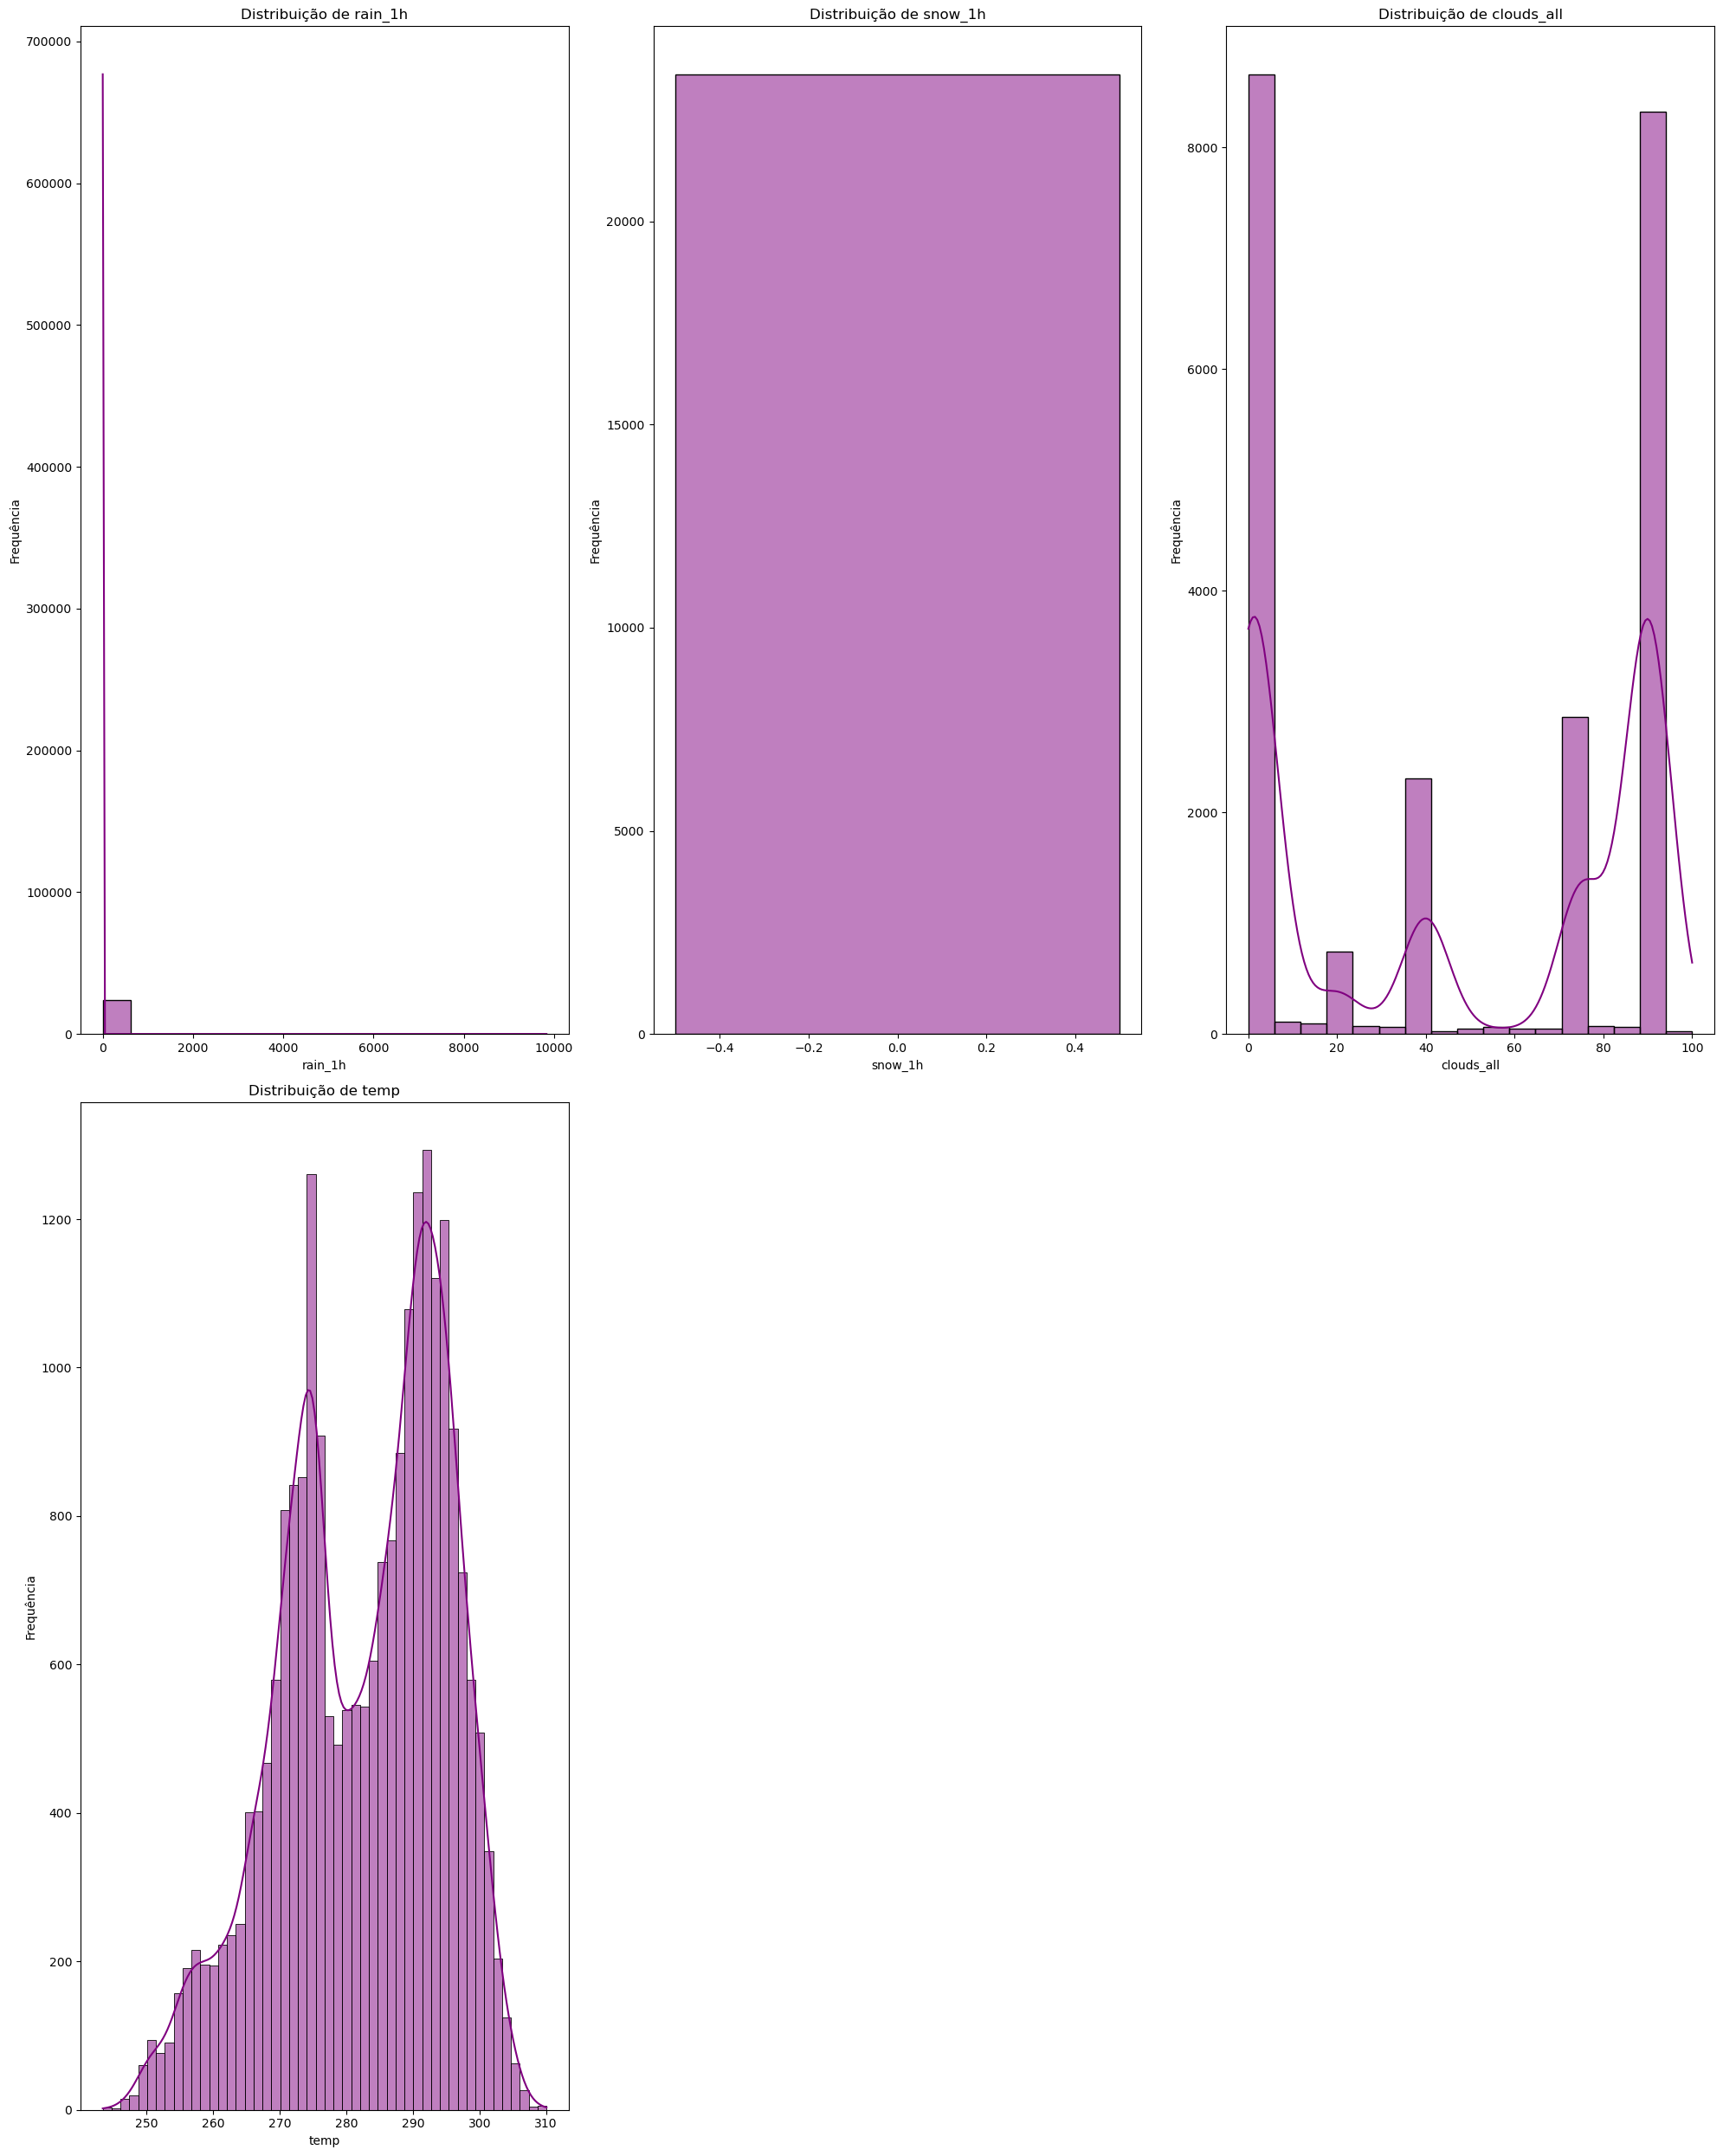

In [257]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='purple')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

Através dos gráficos é possível concluir que:

Lead Time: A distribuição é assimétrica à direita, indicando que a maioria das reservas é feita com um tempo de antecedência menor, mas existem casos de reservas com um lead_time muito maior.

Arrival Date Year: Observa-se uma maior concentração de reservas nos anos de 2016 e 2017, o que pode indicar que estes são os anos principais do dataset.

Arrival Date Week Number: A distribuição é relativamente uniforme ao longo das semanas do ano, sem picos significativos, indicando que as reservas estão bem distribuídas entre as semanas.

Stays in Weekend Nights e Stays in Week Nights: A maioria das reservas inclui poucas noites de fim de semana e durante a semana, sugerindo que as estadias curtas são mais comuns.

Adults, Children e Babies: A distribuição de adults mostra que a maioria das reservas é para 1 ou 2 adultos, enquanto o número de crianças e bebés é geralmente baixo, com poucos casos de famílias maiores.

Previous Cancellations e Previous Bookings Not Canceled: A maioria dos clientes não teve cancelamentos ou reservas anteriores não canceladas, indicando que muitos podem ser novos clientes ou clientes sem um histórico de cancelamentos.

Is Repeated Guest: A maioria dos hóspedes não é um cliente recorrente, sugerindo que muitos hóspedes estão a fazer reservas pela primeira vez.

Agent e Company: A distribuição de agent e company mostra uma concentração em certos valores específicos, o que pode representar parceiros ou agentes de reserva mais comuns.

Booking Changes: A maioria das reservas não apresenta alterações, com uma pequena parte mostrando mudanças feitas nas reservas.

Agent: A distribuição mostra uma concentração em torno de alguns valores específicos, indicando que poucos agentes ou plataformas de reserva são responsáveis por grande parte das reservas.

Company: Existe uma distribuição mais diversificada, mas a maior parte dos registros está concentrada em valores baixos ou ausentes, indicando que muitas reservas não estão associadas a uma empresa específica.

Days in Waiting List: A maioria das reservas não tem dias em lista de espera (valor 0), com apenas algumas reservas passando por períodos de espera, o que é raro.

ADR (Average Daily Rate): A distribuição é assimétrica com uma cauda longa à direita, sugerindo que a maioria das tarifas diárias médias é baixa, mas existem outliers com valores significativamente altos.

Required Car Parking Spaces: A maioria das reservas não solicita estacionamento (valor 0), com poucas reservas requerendo um ou mais espaços, o que mostra que a demanda por estacionamento é baixa.

Total of Special Requests: A distribuição mostra que a maioria dos clientes faz poucos pedidos especiais (0 ou 1), com alguns fazendo mais de dois pedidos, mas em menor frequência.
</div>

## 2.4 Atributos Categóricos

O *dataset* (df) apresenta o seguinte conjunto de atributos categóricos:

+ *hotel*
+ *arrival_date_month*
+ *meal*
+ *country*
+ *market_segment*
+ *distribution_channel*
+ *reserved_room_type*
+ *assigned_room_type*
+ *deposit_type*
+ *customer_type*
+ *reservation_status*
+ *reservation_status_date*
+ *name*
+ *email*
+ *phone-number*
+ *credit_card*



Verificaram-se os tipos de dados das colunas.

In [262]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Existem", len(categorical_cols),"atributos categóricos:" , list(categorical_cols))

Existem 4 atributos categóricos: ['date_time', 'holiday', 'weather_main', 'weather_description']


Plotaram-se gráficos para visualização dos dados.

C:\Users\babis\AppData\Local\Temp\ipykernel_67392\2444083559.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\babis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


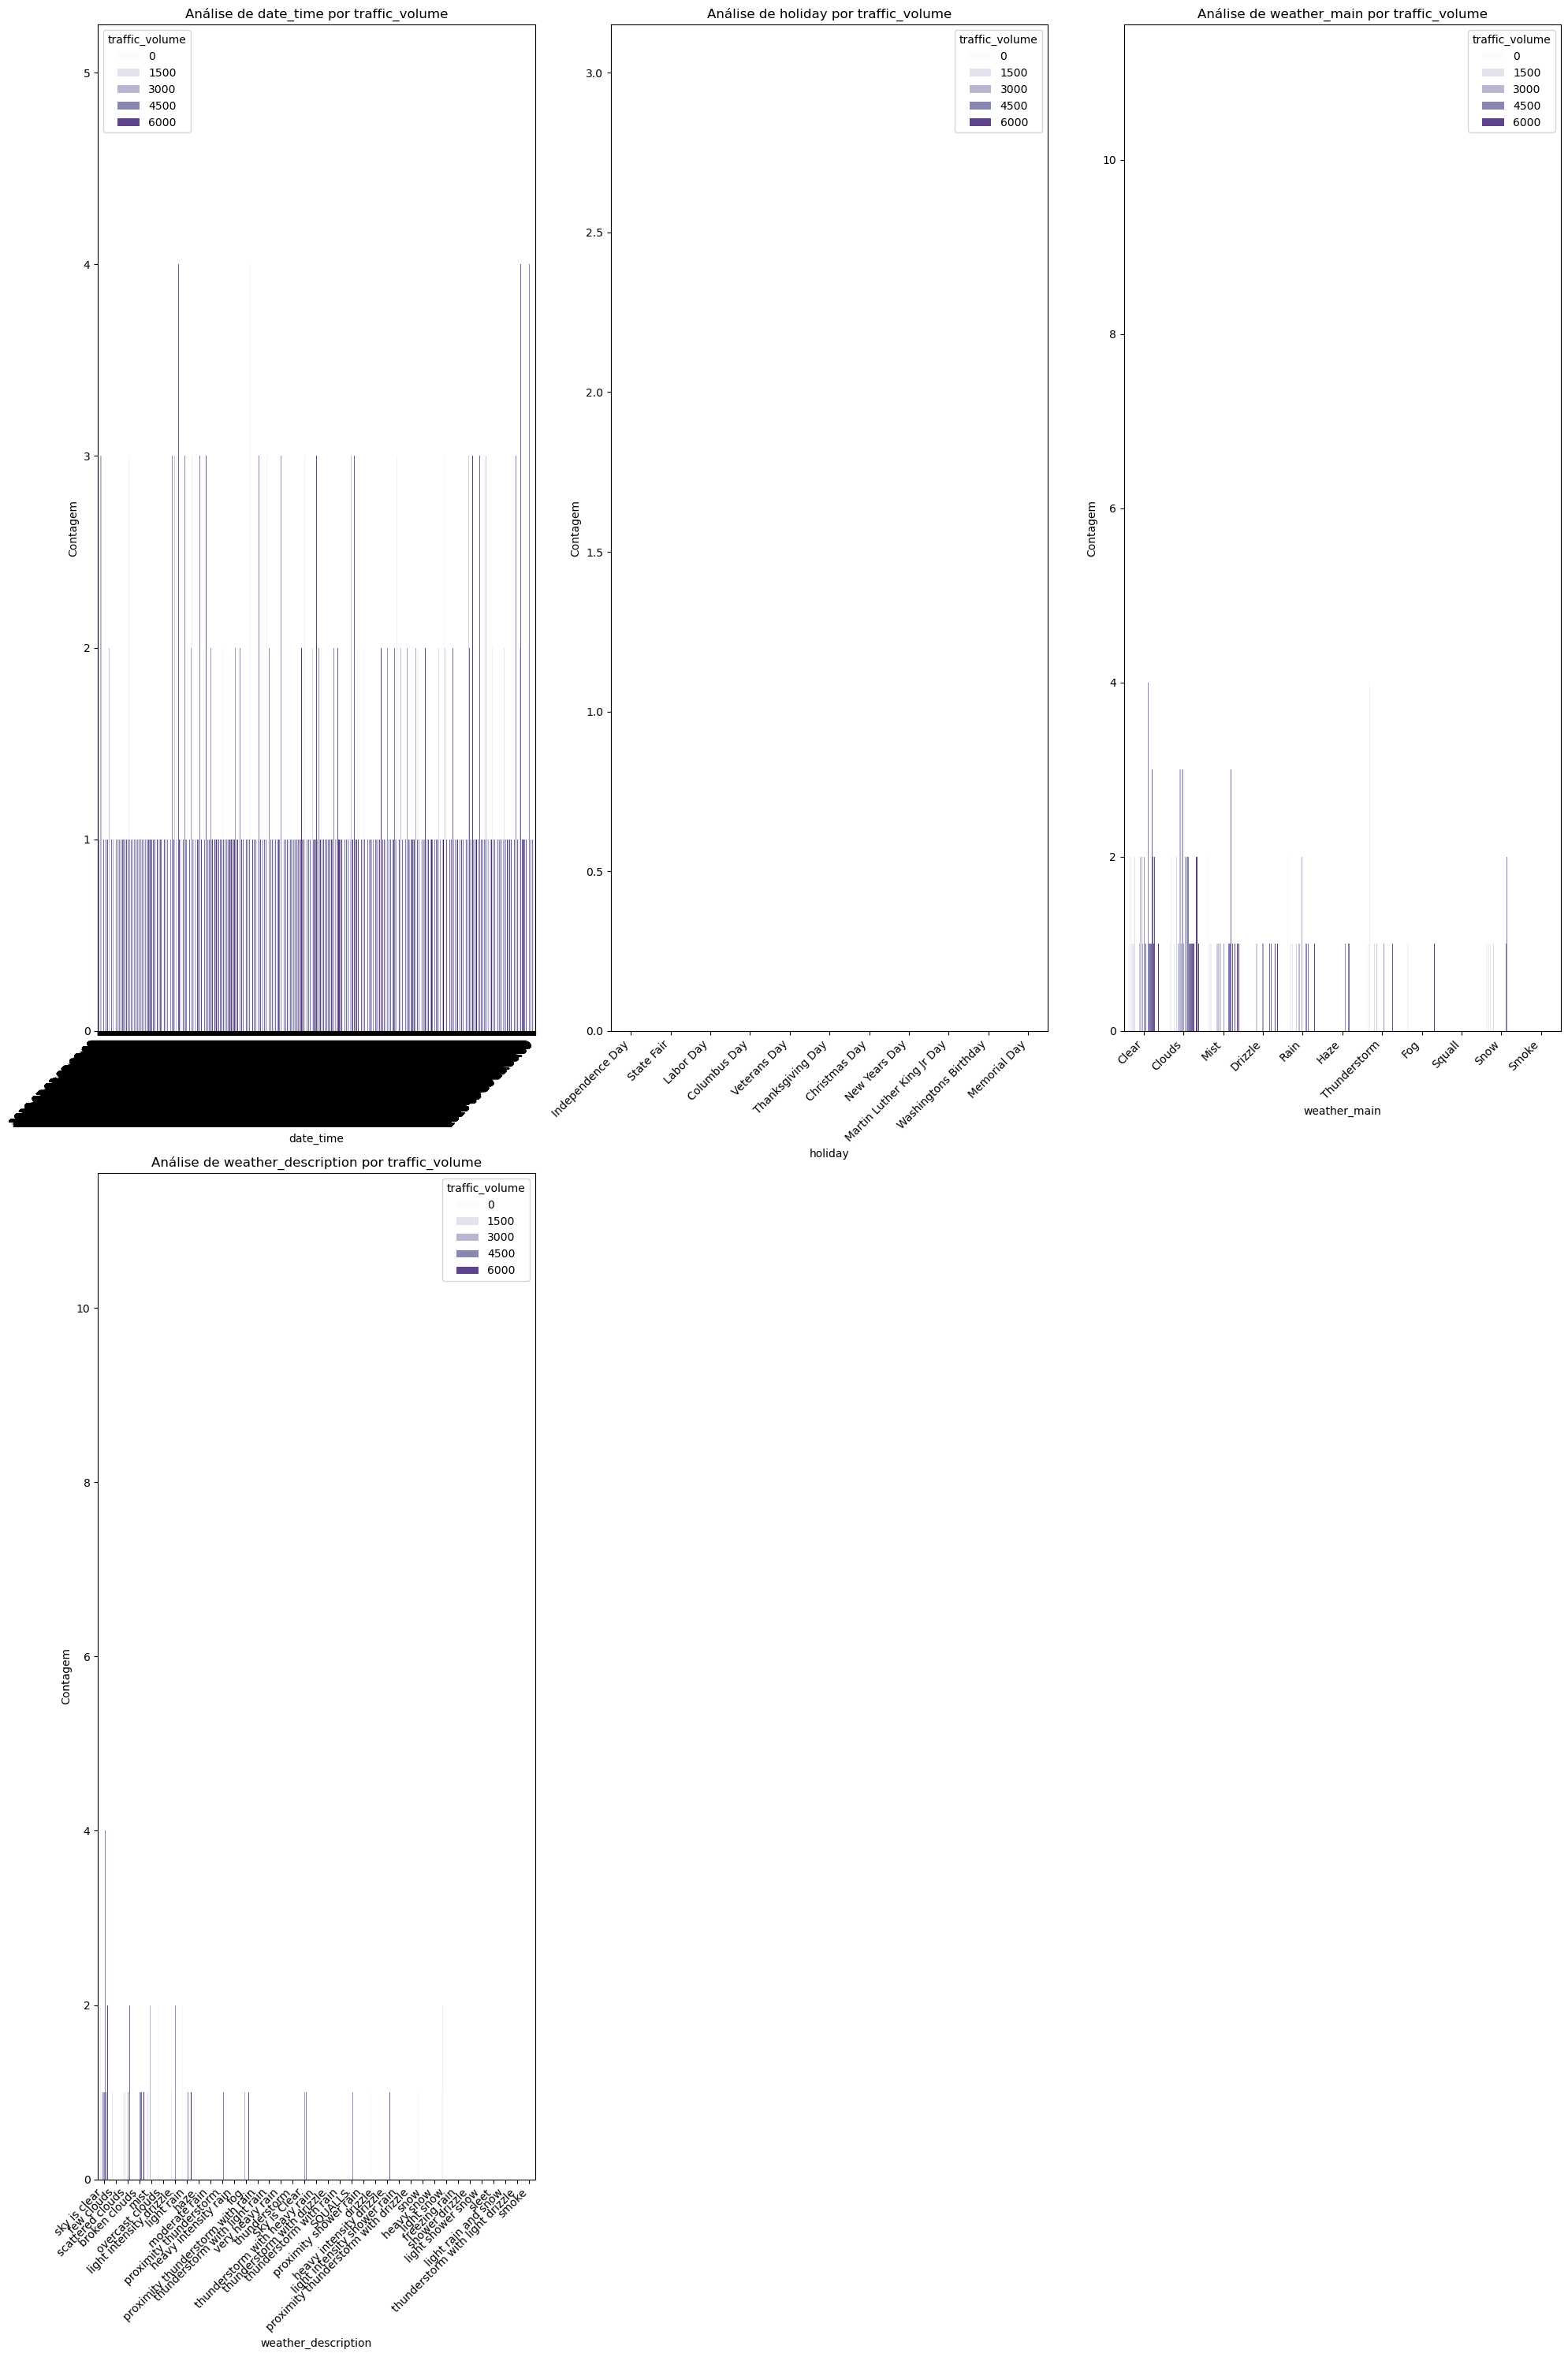

In [264]:
plt.figure(figsize=(20, 30))
 
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    sns.countplot(data=df, x=col, hue='traffic_volume', palette='Purples')
    plt.title(f'Análise de {col} por traffic_volume')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Contagem')
 
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

Com base nos gráficos, é possível concluir o seguinte sobre a variável is_canceled em relação a outras variáveis categóricas:

Hotel: Os cancelamentos são mais comuns em hotéis do tipo "City Hotel" do que em "Resort Hotel", o que pode indicar que reservas em hotéis urbanos estão mais sujeitas a cancelamentos.

Arrival Date Month: A distribuição de cancelamentos varia ao longo dos meses. Meses como janeiro e agosto parecem ter uma proporção maior de cancelamentos em comparação a outros meses, indicando possíveis sazonalidades que afetam as taxas de cancelamento.

Meal: A maior parte das reservas canceladas está associada ao plano de refeição "BB" (Bed & Breakfast). Isto sugere que os hóspedes que optam por esse tipo de refeição podem ter maior tendência a cancelar.

Country: A distribuição de cancelamentos por país parece bastante dispersa, com a maioria dos países apresentando um número pequeno de cancelamentos. No entanto, alguns países específicos (provavelmente com maior número de reservas) mostram uma quantidade considerável de cancelamentos.

Market Segment: Cancelamentos são mais frequentes em segmentos como "Online TA" (Online Travel Agencies), seguido por "Groups". Estes segmentos podem ter características específicas que aumentam a probabilidade de cancelamento.

Distribution Channel: O canal de distribuição "TA/TO" (Travel Agent/Tour Operator) apresenta um número elevado de cancelamentos em comparação a outros canais, como "Direct" ou "Corporate". Isto pode indicar que reservas feitas através de intermediários são mais suscetíveis a cancelamento.

Reserved Room Type: A maior parte das reservas canceladas está associada ao tipo de quarto "A", que é também o tipo de quarto mais comum nas reservas. Os outros tipos de quarto apresentam menos cancelamentos em proporção.

Assigned Room Type: Assim como o tipo de quarto reservado, o tipo de quarto atribuído "A" tem uma quantidade considerável de cancelamentos, o que pode indicar uma correlação entre o tipo de quarto atribuído e a decisão de cancelamento.

Deposit Type: A maioria dos cancelamentos ocorre em reservas com "No Deposit" (sem depósito), enquanto reservas com "Non Refund" (não reembolsável) apresentam significativamente menos cancelamentos, o que é esperado devido à política mais restritiva.

Customer Type: Clientes do tipo "Transient" (hóspedes que fazem reservas individuais, geralmente para estadias curtas) têm uma proporção mais alta de cancelamentos, comparado a outros tipos como "Contract" e "Group".

Reservation Status: O status "Canceled" está diretamente relacionado a is_canceled e confirma a quantidade de reservas efetivamente canceladas. O status "Checked-Out" representa reservas que não foram canceladas e seguiram com o processo normal.

Reservation Status Date: A distribuição dos cancelamentos por data de status da reserva é bastante dispersa, com alguns picos ao longo do tempo, indicando que podem haver datas específicas com maior incidência de cancelamentos.

Name: A distribuição de cancelamentos por name é dispersa e não apresenta um padrão claro. Isto sugere que a variável name por si só não contribui significativamente para prever cancelamentos, uma vez que não há uma relação visível entre nomes específicos e a ocorrência de cancelamentos.

Email: A análise por email também mostra uma distribuição dispersa e pouco informativa. Tal como name, a variável email não parece fornecer uma indicação direta de cancelamento, pois os valores são diversos e a relação entre eles e os cancelamentos é difusa.

Phone-number: A variável phone-number apresenta uma distribuição que não revela um padrão perceptível entre números de telefone e cancelamentos. Isso indica que o número de telefone não é uma variável relevante para prever se uma reserva será cancelada.

Credit Card: A análise da variável credit_card mostra uma distribuição levemente mais segmentada, mas ainda assim não parece ter uma relação clara com os cancelamentos. A variabilidade pode indicar que, embora os cartões de crédito sejam um dado importante para a reserva, eles não são necessariamente indicadores diretos de cancelamento.
</div>

<div class="alert alert-block alert-info">
Agregou-se as colunas ['agent'] e ['company'], numa só coluna denominada ['agent_company'], uma vez que, as colunas agregadas transmitem a informação de quem realizou a reserva e essa informação numa só coluna, facilita a análise dos dados.

Criou-se a coluna ['arrival_date_combined'], que combina ['arrival_date_year'], ['arrival_date_month'] e ['arrival_date_day_of_month'] numa única coluna de data, representando a data completa de chegada.

Criou-se a coluna ['total_stays_nights'], que soma ['stays_in_weekend_nights'] e ['stays_in_week_nights'] para obter o total de noites de estadia.

Criou-se a coluna ['total_people'], que agrega ['adults'], ['children'] e ['babies'] para representar o total de pessoas na reserva.

As colunas que foram agrupadas foram removidas do DataFrame para evitar redundância e simplificar a análise.

</div>

## 2.6 Duplicados

Removeu-se as colunas duplicadas do conjunto de dados para garantir que os dados não contenham repetições que possam distorcer análises e os modelos, levando a resultados menos precisos.

In [269]:
print('Shape before deleting duplicate values:', df.shape)

df = df.drop_duplicates()

print('Shape after deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (23622, 9)
Shape after deleting duplicate values: (23607, 9)


<div class="alert alert-block alert-info">
Conclui-se que antes de remover os valores duplicados, o dataset tinha um total de 119.390 registros com 26 colunas. Após a remoção dos duplicados, o conjunto de dados foi reduzido para 87.367 registros, mantendo o mesmo número de colunas.
</div>

## 2.7 Valores em Falta e respetivo preenchimento

<div class="alert alert-block alert-info">
Identificou-se os valores ausentes e com base no cálculos da sua percentagem, efetou-se o preenchimento desses valores na coluna ['country'] com a string "Desconhecido", de forma a indicar que a informação do país não está disponível e para o caso da coluna ['total_people'] preencheu-se com a mediana porque é uma medida que não é influenciada por outliers.
</div>

In [273]:

# Check for missing values
missing_values_summary = df.isnull().sum()

missing_values_summary


date_time                  0
holiday                23576
weather_main               0
weather_description        0
rain_1h                    0
snow_1h                    0
clouds_all                 0
temp                       0
traffic_volume             0
dtype: int64

In [274]:

# Check the percentage of missing values
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_values_percent


date_time               0.000000
holiday                99.868683
weather_main            0.000000
weather_description     0.000000
rain_1h                 0.000000
snow_1h                 0.000000
clouds_all              0.000000
temp                    0.000000
traffic_volume          0.000000
dtype: float64

Preencheram-se valores ausentes para evitar perda de dados.

In [276]:
df = df.copy() 
df['date_time'] = pd.to_datetime(df['date_time'])

holiday_mask = df['holiday'].notnull()

for idx, row in df[holiday_mask].iterrows():
    start_of_day = row['date_time'].normalize()
    end_of_day = start_of_day + pd.Timedelta(days=1)
    
    df.loc[(df['date_time'] >= start_of_day) & (df['date_time'] < end_of_day), 'holiday'] = row['holiday']

df.iloc[70:100]

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
70,2016-07-03 22:00:00,NaN,Clouds,few clouds,0.0,0.0,20,292.98,2252
71,2016-07-03 23:00:00,NaN,Clouds,few clouds,0.0,0.0,20,291.46,1985
72,2016-07-04 00:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,289.95,1115
73,2016-07-04 01:00:00,Independence Day,Mist,mist,0.0,0.0,1,289.70,581
74,2016-07-04 02:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.95,436
75,2016-07-04 03:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.74,270
76,2016-07-04 04:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.54,304
77,2016-07-04 05:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.60,660
78,2016-07-04 06:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.49,825
79,2016-07-04 07:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,289.56,798


In [277]:

# Fill missing values in the 'country' column with "Desconhecido"
df['holiday'] = df['holiday'].fillna('Not a holiday')

missing_values_summary_after = df.isnull().sum()
missing_values_summary_after


date_time              0
holiday                0
weather_main           0
weather_description    0
rain_1h                0
snow_1h                0
clouds_all             0
temp                   0
traffic_volume         0
dtype: int64

**Remoção de uma coluna**

In [279]:
# Remover a coluna "snow_1h" do dataset
df = df.drop(columns=['snow_1h'])

df


,date_time,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,Not a holiday,Clear,sky is clear,0.0,1,289.04,825
1,2016-07-01 01:00:00,Not a holiday,Clear,sky is clear,0.0,1,288.16,531
2,2016-07-01 02:00:00,Not a holiday,Clear,sky is clear,0.0,1,286.64,381
3,2016-07-01 03:00:00,Not a holiday,Clear,sky is clear,0.0,1,285.39,406
4,2016-07-01 04:00:00,Not a holiday,Clear,sky is clear,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,Not a holiday,Clouds,broken clouds,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,Not a holiday,Clouds,overcast clouds,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,Not a holiday,Thunderstorm,proximity thunderstorm,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,Not a holiday,Clouds,overcast clouds,0.0,90,282.09,1450


## 2.8 Matriz de correlação

Elaborou-se uma matriz de correlação para ajudar a identificar as relações entre variáveis numéricas, mostrando quais variáveis têm correlações fortes (positivas ou negativas).

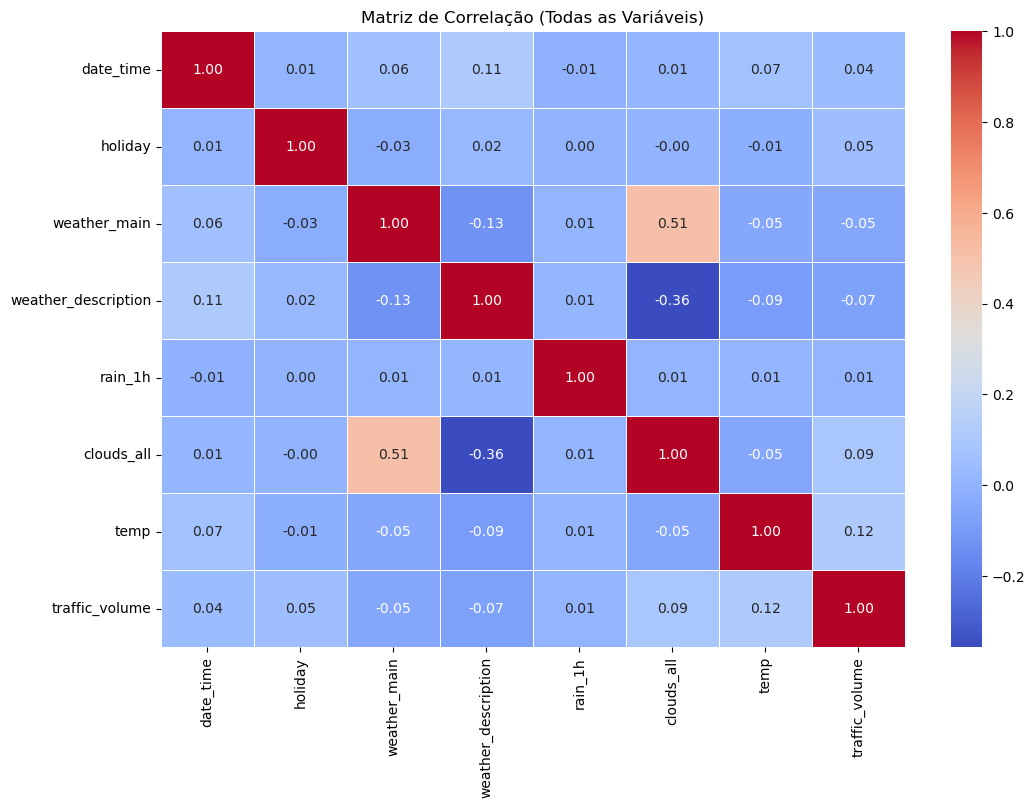

In [282]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o codificador
label_encoder = LabelEncoder()

# Aplicar o codificador nas colunas categóricas
df_encoded = df.copy()

# Aplicar a codificação para todas as colunas não numéricas
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Calcular a matriz de correlação para o dataset completo
correlation_matrix_all = df_encoded.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Todas as Variáveis)')
plt.show()


<div class="alert alert-block alert-info">
Correlação com is_canceled:

A variável lead_time tem uma correlação positiva moderada com is_canceled (0.18), o que sugere que quanto maior o tempo de antecedência da reserva, maior a probabilidade de cancelamento.

adr (tarifa diária média) apresenta uma correlação de 0.13, o que indica que tarifas mais altas podem estar levemente associadas a um aumento na probabilidade de cancelamento.

total_of_special_requests tem uma correlação negativa de -0.12 com is_canceled, o que sugere que clientes que fazem mais pedidos especiais têm menor probabilidade de cancelar.

is_repeated_guest e previous_bookings_not_canceled apresentam uma correlação positiva de 0.44, o que indica que clientes que são hóspedes recorrentes tendem a ter um histórico de reservas não canceladas.

previous_cancellations e previous_bookings_not_canceled têm uma correlação de 0.39, o que mostra que clientes que tiveram cancelamentos prévios também podem ter um histórico de reservas bem-sucedidas.

adr e total_people mostram uma correlação de 0.39, o que indica que, em geral, um maior número de pessoas pode estar associado a tarifas diárias médias mais altas.

Variáveis como days_in_waiting_list e arrival_date_week_number têm correlações muito baixas com is_canceled, o que suegere que elas têm pouco impacto na previsão de cancelamento.

A variável required_car_parking_spaces tem uma correlação negativa baixa (-0.18) com is_canceled, o qe indica uma leve tendência de menor probabilidade de cancelamento quando é solicitado espaço de estacionamento.
</div>

<div class="alert alert-block alert-success"> 
Nesta fase, foi realizada uma análise detalhada dos dados, centrando-se nas variáveis numéricas e categóricas. A variável is_canceled foi identificada como a variável target, e a sua distribuição revelou um desbalanceamento, um fator relevante para a modelação, uma vez que pode afetar a performance dos modelos. Variáveis como lead_time e customer_type demonstraram correlações significativas com o cancelamento, o que orientou a seleção de características para a modelação.

A análise inicial dos dados revelou que variáveis como o tempo de antecedência da reserva (lead_time) e o tipo de cliente têm um impacto significativo na previsão de cancelamentos. Estas observações serviram de base para o pré-processamento e para a seleção de características.
</div>

In [285]:
# Selecionar 3000 linhas aleatórias
df_sample = df_encoded.sample(n=3000, random_state=42)

# Exibir as primeiras linhas do novo dataset
df_sample.head()

,date_time,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume
18017,2018-03-25 00:00:00,7,0,26,0.0,1,273.51,1324
12391,2017-09-07 12:00:00,7,1,2,0.0,75,291.15,5083
12368,2017-09-06 16:00:00,7,1,2,0.0,75,291.28,6799
16637,2018-02-03 20:00:00,7,8,16,0.0,90,263.15,2632
2710,2016-10-12 21:00:00,7,0,1,0.0,0,276.35,2154


In [286]:
df_sample['temp_celsius'] = df_sample['temp'] - 273.15

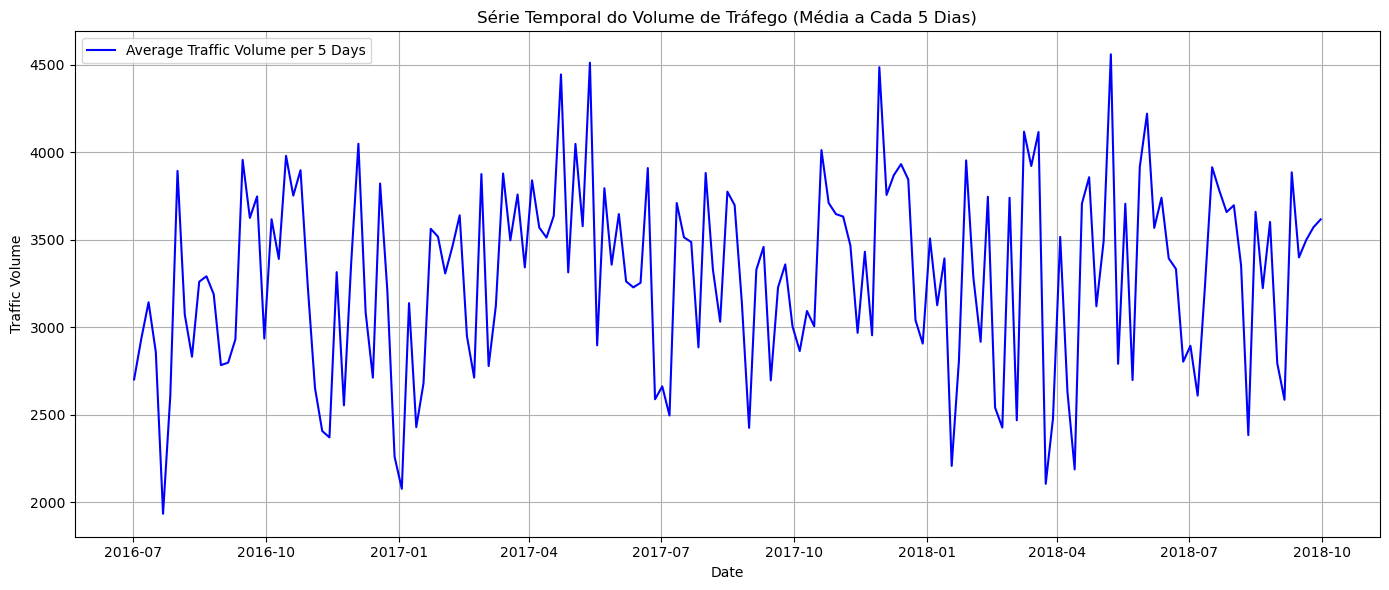

In [287]:
# Seleciona todas as colunas numéricas, incluindo 'traffic_volume'
numerical_cols_sample = df_sample.select_dtypes(include=['int64', 'float64']).columns

# Resample a cada 5 dias, agrupando os dados e calculando a média
df_pentadal = df_sample.resample('5D', on='date_time')[numerical_cols_sample].mean()

# Verifique se 'traffic_volume' está presente no dataframe resultante
if 'traffic_volume' in df_pentadal.columns:
    # Plotar série temporal com média a cada 5 dias
    plt.figure(figsize=(14, 6))
    plt.plot(df_pentadal.index, df_pentadal['traffic_volume'], color='blue', label='Average Traffic Volume per 5 Days')
    plt.xlabel('Date')
    plt.ylabel('Traffic Volume')
    plt.title('Série Temporal do Volume de Tráfego (Média a Cada 5 Dias)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("'traffic_volume' não está disponível após o resample.")

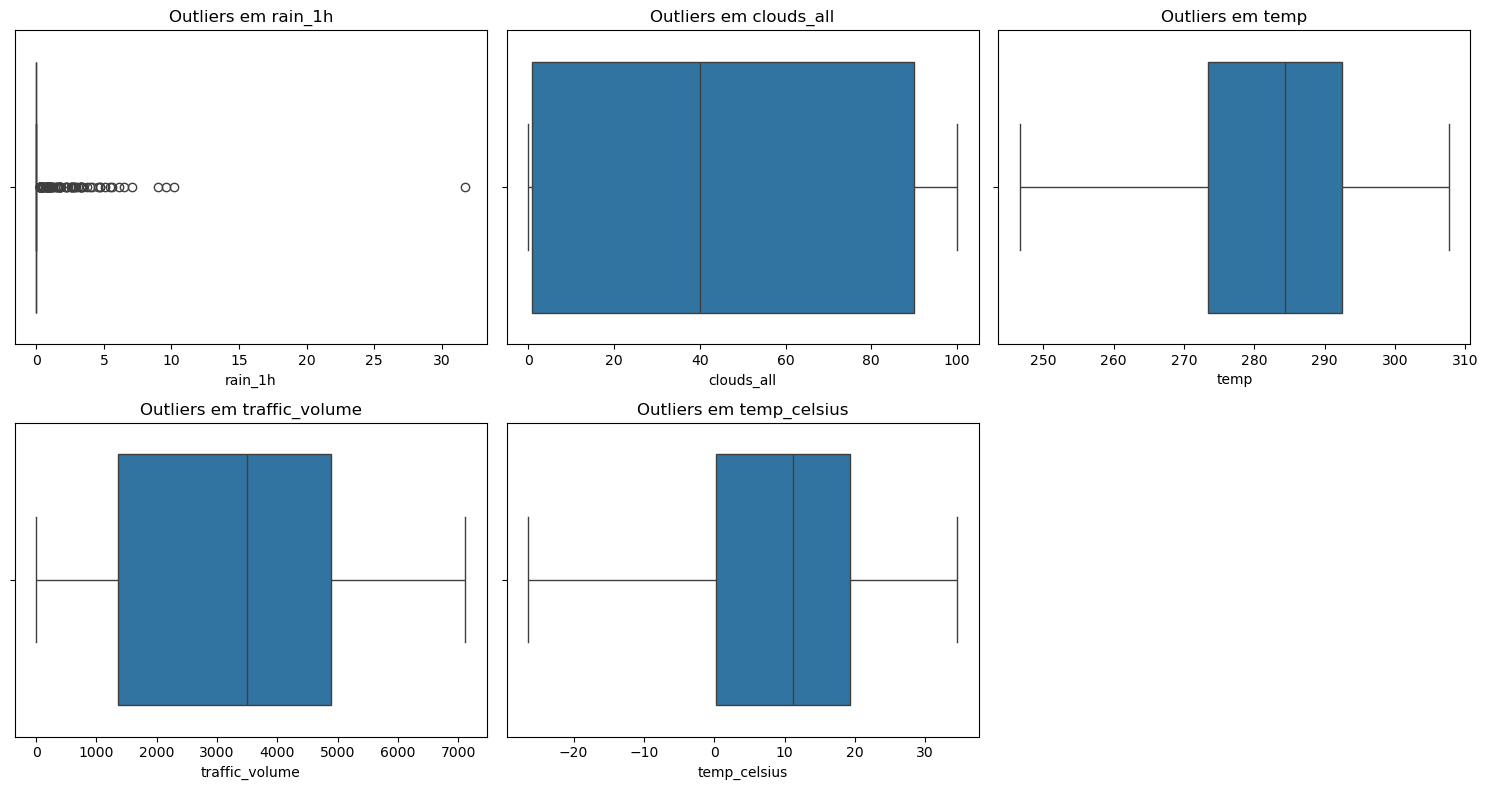

In [288]:
plt.figure(figsize=(15, 8))
for i, var in enumerate(numerical_cols_sample):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_sample[var])
    plt.title(f'Outliers em {var}')
plt.tight_layout()
plt.show()

**Deep Learning**

In [290]:
df_sample = df_sample[~df_sample.index.duplicated(keep='first')]
df_sample = df_sample.asfreq('h')

In [291]:
def slideWindow(series, n, m):
    X, y = [], []
    for i in range(len(series) - n - m + 1):
        X.append(series[i:i+n])
        y.append(series[i+n:i+n+m])
    return np.array(X), np.array(y)

# Dados a serem usados: temperatura
series = df_sample['temp_celsius'].dropna().values

# Criar janelas com n=6 (input) e m=1 (output)
n, m = 6, 1
if len(series) < n + m:
    raise ValueError(f"A série temporal é muito curta ({len(series)} amostras) para criar janelas com n={n} e m={m}. Ajuste os parâmetros.")

# Criar janelas com n=6 (input) e m=1 (output)
X, y = slideWindow(series, n, m)

# Verificar se X e y foram gerados corretamente
if len(X) == 0 or len(y) == 0:
    raise ValueError("A função slideWindow não gerou dados. Verifique os parâmetros n e m.")


ValueError: A série temporal é muito curta (0 amostras) para criar janelas com n=6 e m=1. Ajuste os parâmetros.

In [ ]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

# Garantir que as divisões tenham tamanho válido
if train_size == 0 or val_size == 0 or test_size == 0:
    raise ValueError(f"O número de amostras é insuficiente para dividir em treino, validação e teste. Total de amostras: {len(X)}")

# Realizar a divisão
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Verificar as formas dos dados
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

In [ ]:
#converter para tensores
X_train, X_val, X_test = map(lambda x: np.expand_dims(x, -1), [X_train, X_val, X_test])
y_train, y_val, y_test = map(lambda y: np.expand_dims(y, -1), [y_train, y_val, y_test])

In [ ]:
def create_model(units=50, activation='relu', optimizer='adam'):
    model = Sequential([
        GRU(units, activation=activation, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Envolver o modelo com KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Grid de parâmetros
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'RMSprop'],
    'epochs': [20, 50],
    'batch_size': [16, 32]
}

# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train_scaled, y_train_scaled)

# Melhor conjunto de hiperparâmetros
best_params = grid_result.best_params_
print("Melhores parâmetros encontrados:", best_params)

In [ ]:
# Modelos GRU e LSTM para one-step forecasting
input_shape = X_train.shape[1:]

def create_gru_model(output_steps):
    model = Sequential([
        GRU(50, activation='relu', input_shape=input_shape),
        Dense(output_steps)  # Agora ajustado para prever múltiplas saídas
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def create_lstm_model(output_steps):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dense(output_steps)  # Agora ajustado para prever múltiplas saídas
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [ ]:
# Treinar modelos
gru_model = create_gru_model()
lstm_model = create_lstm_model()

print("\nTreinando GRU...")
gru_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

print("\nTreinando LSTM...")
lstm_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

In [ ]:
# Fazer previsões com o conjunto de teste
y_pred_gru = gru_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

# Avaliar previsões
def evaluate(y_true, y_pred):
    y_true = y_true.squeeze()
    y_pred = y_pred.squeeze()
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, mape

gru_mae, gru_mse, gru_mape = evaluate(y_test, y_pred_gru)
lstm_mae, lstm_mse, lstm_mape = evaluate(y_test, y_pred_lstm)

print("\nAvaliação GRU: MAE = {:.4f}, MSE = {:.4f}, MAPE = {:.2f}%".format(gru_mae, gru_mse, gru_mape))
print("\nAvaliação LSTM: MAE = {:.4f}, MSE = {:.4f}, MAPE = {:.2f}%".format(lstm_mae, lstm_mse, lstm_mape))

# Visualizar previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test.flatten(), label='Verdadeiro', alpha=0.7)
plt.plot(y_pred_gru.flatten(), label='Previsão GRU', alpha=0.7)
plt.plot(y_pred_lstm.flatten(), label='Previsão LSTM', alpha=0.7)
plt.legend()
plt.title('Previsões de One-Step Forecasting')
plt.show()

In [ ]:
# Atualizar modelos para multi-step (m=3)
gru_model = create_gru_model(output_steps=m)
lstm_model = create_lstm_model(output_steps=m)

print("\nTreinando GRU para Multi-Step...")
gru_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

print("\nTreinando LSTM para Multi-Step...")
lstm_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

# Fazer previsões
y_pred_gru = gru_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

# Avaliar previsões
def evaluate_multi_step(y_true, y_pred):
    mae = np.mean([mean_absolute_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])
    mse = np.mean([mean_squared_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])
    mape = np.mean([np.mean(np.abs((y_true[:, i] - y_pred[:, i]) / y_true[:, i])) * 100 for i in range(y_true.shape[1])])
    return mae, mse, mape

gru_mae, gru_mse, gru_mape = evaluate_multi_step(y_test, y_pred_gru)
lstm_mae, lstm_mse, lstm_mape = evaluate_multi_step(y_test, y_pred_lstm)

print("\nAvaliação Multi-Step GRU: MAE = {:.4f}, MSE = {:.4f}, MAPE = {:.2f}%".format(gru_mae, gru_mse, gru_mape))
print("\nAvaliação Multi-Step LSTM: MAE = {:.4f}, MSE = {:.4f}, MAPE = {:.2f}%".format(lstm_mae, lstm_mse, lstm_mape))


In [ ]:
# Visualizar previsões multi-step
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0].flatten(), label='Verdadeiro Dia 1', alpha=0.7)
plt.plot(y_pred_gru[:, 0].flatten(), label='Previsão GRU Dia 1', alpha=0.7)
plt.plot(y_pred_lstm[:, 0].flatten(), label='Previsão LSTM Dia 1', alpha=0.7)
plt.legend()
plt.title('Previsões Multi-Step (Dia 1)')
plt.show()